### We will be using the winconsin break cancer dataset
The aim is to categorize the cells as either malignant or benign

#### Load the dataset

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
data = load_breast_cancer()

In [32]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Exploratory Data Analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [35]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
def plot_feature_distribution(feature_name:str, bins: int):
    sns.histplot(
                data = df[feature_name], 
                kde= True, 
                bins = bins,           
                )
    plt.title(f"\nDitribution of {feature_name}\n")
    plt.xlabel(feature_name)
    plt.ylabel('\nDistribution count\n')
    plt.show()

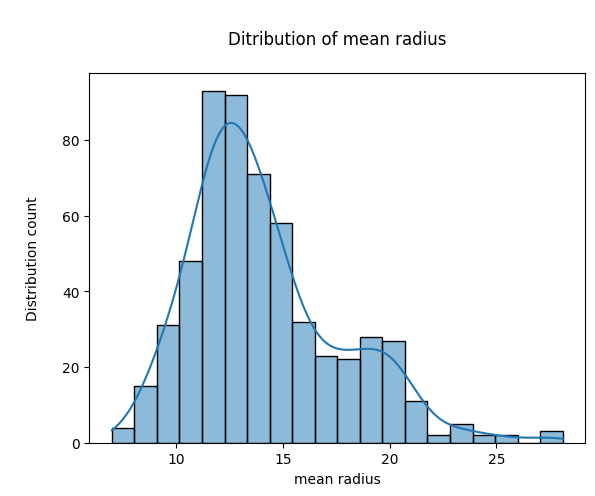

In [37]:
plot_feature_distribution('mean radius', 20)

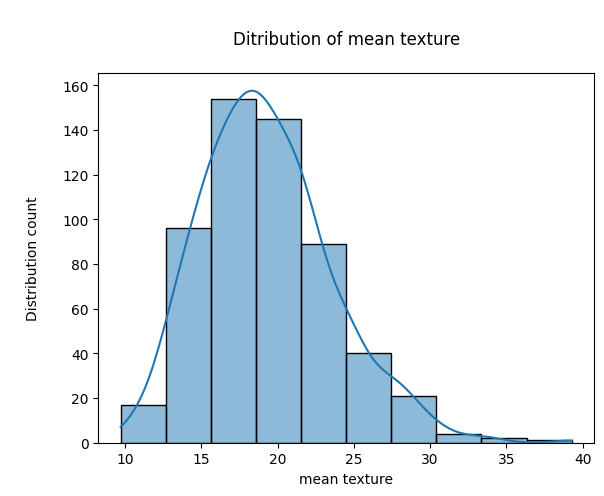

In [38]:
plot_feature_distribution('mean texture', bins= 10)

In [39]:
#There is an evidence of skewness for both features, they are right skewed...
# This means they are positiively skewed, and the mean is greater the median.
# Most values fall close to the lower values () 

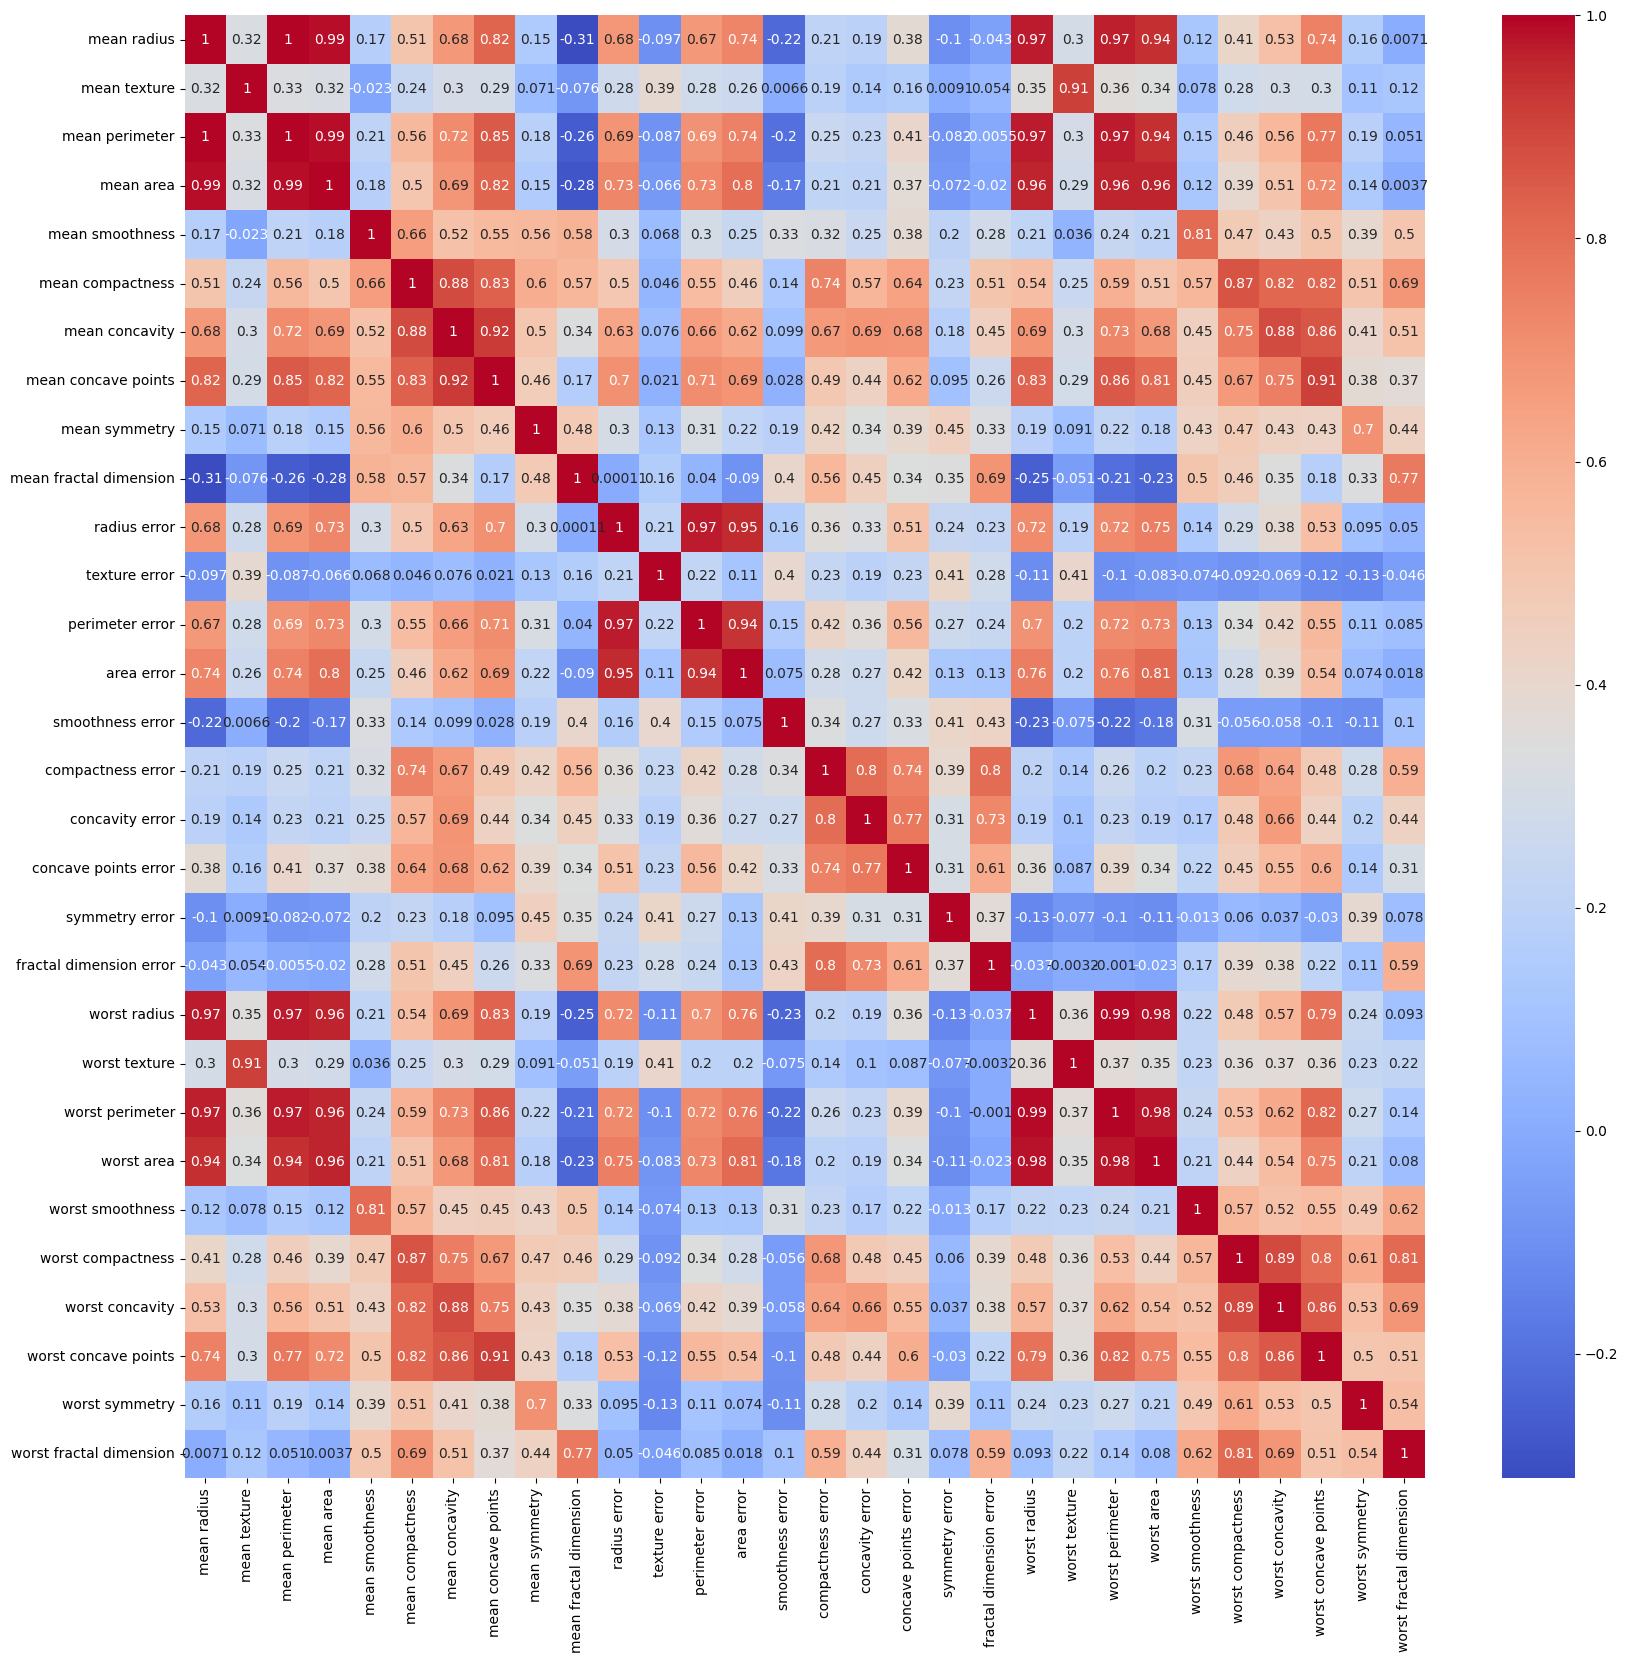

In [40]:
corr = df.corr()
plt.figure(figsize=(20, 19))
sns.heatmap(data = corr, cmap= 'coolwarm', annot = True)
plt.show()

In [41]:
features = df
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
# Analysing the balance of the balance of target classe
labels = pd.DataFrame(data = data.target, columns= ['target'])

In [43]:
labels['encoded'] = labels['target'].apply(lambda x: 'Malignant (cancerous)' if x == 1 else 'Benign (non-cancerous)')

In [44]:
labels

,target,encoded
0,0,Benign (non-cancerous)
1,0,Benign (non-cancerous)
2,0,Benign (non-cancerous)
3,0,Benign (non-cancerous)
4,0,Benign (non-cancerous)
...,...,...
564,0,Benign (non-cancerous)
565,0,Benign (non-cancerous)
566,0,Benign (non-cancerous)
567,0,Benign (non-cancerous)


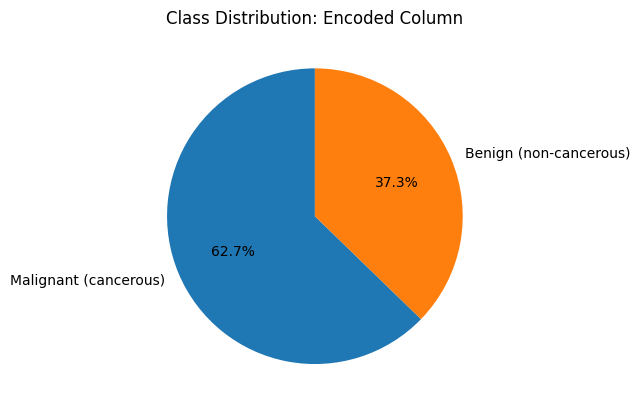

In [45]:
counts = labels['encoded'].value_counts()
plt.pie(x= counts, labels= counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution: Encoded Column')
plt.show()

### Data preparation and scaling

In [46]:
from sklearn.model_selection import train_test_split
X = features
y = labels['encoded'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [47]:
#Feature normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ = pd.DataFrame(data = scaler.fit_transform(X_train),
                       columns = X_train.columns)
X_test_ = pd.DataFrame(data = scaler.fit_transform(X_test), columns =  X_test.columns)

In [48]:
X_train_.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,-0.263800,-0.016052,-0.470414,-0.474761,0.838365,3.251027,8.438937,3.391987,2.621166,2.061208,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,0.805319,-0.812687,0.751957,0.877170,-0.896053,1.181222,0.183628,0.600596,-0.317717,0.529636,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,0.027521,1.963060,-0.120958,-0.350779,0.572766,0.739499,0.320656,0.589462,2.615041,0.718928,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,-0.538505,0.536473,-0.657950,-0.496590,0.065475,-0.822404,-0.685565,-0.898485,0.123299,-0.431547,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,0.402278,0.440382,0.219314,-0.115532,0.171911,-0.787970,-0.783509,-0.588648,2.604015,0.765981,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_, y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_accuracy = accuracy_score(y_train, model.predict(X_train_))
print(f"Train accuracy: {train_accuracy}")
test_accuracy = accuracy_score(y_test, model.predict(X_test_))
print(f"Test accuracy: {test_accuracy}")

train_confusion_matrix_scores = confusion_matrix(y_true= y_train, y_pred = model.predict(X_train_))
test_confusion_matrix_scores = confusion_matrix(y_true= y_test, y_pred = model.predict(X_test_))
print(f"Train Cofusion Matrix:\n{train_confusion_matrix_scores}")
print(f"Test Cofusion Matrix: \n{test_confusion_matrix_scores}")

Train accuracy: 0.9868131868131869
Test accuracy: 0.9824561403508771
Train Cofusion Matrix:
[[165   4]
 [  2 284]]
Test Cofusion Matrix: 
[[41  2]
 [ 0 71]]


Train Confusion Matrix:
Predicted Negative (0)	Predicted Positive (1)
Actual 0	165	4
Actual 1	2	284
TN (165): 165 benign cases correctly classified as benign.
FP (4): 4 benign cases incorrectly classified as malignant.
FN (2): 2 malignant cases incorrectly classified as benign.
TP (284): 284 malignant cases correctly classified as malignant.
Interpretation:

High TP and TN values indicate excellent performance, capturing most of the true cases accurately.
Low FP (4 cases) and FN (2 cases) highlight a very small margin of error.
FN is critical in medical diagnoses since missing a malignant case can have severe consequences—only 2 cases were missed here, which is a low risk.
Test Confusion Matrix:
Predicted Negative (0)	Predicted Positive (1)
Actual 0	41	2
Actual 1	0	71
TN (41): 41 benign cases correctly identified.
FP (2): 2 benign cases misclassified as malignant (false alarm).
FN (0): No malignant cases missed, which is ideal for this task.
TP (71): 71 malignant cases accurately predicted.
Interpretation:

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train_)))

                        precision    recall  f1-score   support

Benign (non-cancerous)       0.99      0.98      0.98       169
 Malignant (cancerous)       0.99      0.99      0.99       286

              accuracy                           0.99       455
             macro avg       0.99      0.98      0.99       455
          weighted avg       0.99      0.99      0.99       455



In [52]:
# Model improvement
#We can use feature selection and hyperparameter tuning
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
# Feature Selection using Recursive Feature Elimination (RFE)# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator = LogisticRegression(), 
               n_features_to_select=10, 
               step= 1
               )
X_train_selected = selector.fit_transform(X_train_, y_train)
X_test_selected = selector.transform(X_test_)
# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 
grid_search = GridSearchCV(estimator= LogisticRegression(), 
                           param_grid= param_grid, 
                          cv=5 )
grid_search.fit(X_train_selected, y_train)
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_selected))
best_class_report = classification_report(y_test, best_model.predict(X_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

Improved Model Accuracy: 0.9736842105263158
Improved Confusion Matrix:
[[41  2]
 [ 1 70]]

Improved Classification Report:
                        precision    recall  f1-score   support

Benign (non-cancerous)       0.98      0.95      0.96        43
 Malignant (cancerous)       0.97      0.99      0.98        71

              accuracy                           0.97       114
             macro avg       0.97      0.97      0.97       114
          weighted avg       0.97      0.97      0.97       114

